In [147]:
from influxdb import InfluxDBClient
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
from pandas import read_csv

In [148]:
client = InfluxDBClient('34.220.218.183', 8086, 'root', 'root', 'k8s')


In [149]:
Result_node_CPU = client.query("SELECT value from \"cpu/node_utilization\" where nodename = 'ip-172-31-14-132' AND type = 'node' ")
Result_node_MEM = client.query("SELECT value from \"memory/node_utilization\" where nodename = 'ip-172-31-14-132' AND type = 'node' ")

In [150]:
cpu_points = pd.DataFrame(Result_node_CPU.get_points())
cpu_points['time'] = pd.to_datetime(cpu_points['time'])
cpu_points = cpu_points.set_index('time')
cpu_points.columns = ['cpu']
mem_points = pd.DataFrame(Result_node_MEM.get_points())
mem_points['time'] = pd.to_datetime(mem_points['time'])
mem_points = mem_points.set_index('time')
mem_points.columns = ['mem']

In [151]:
df_node =pd.concat([cpu_points, mem_points], axis=1)

In [152]:
df_node.head()

,cpu,mem
time,,
2018-06-07 19:45:00,0.0000,0.707054
2018-06-07 19:46:00,0.2240,0.802459
2018-06-07 19:47:00,0.0985,0.801797
2018-06-07 19:48:00,0.0625,0.805724
2018-06-07 19:49:00,0.0515,0.806219


In [153]:
df_node.index = pd.to_datetime(df_node.index)
df_node.to_csv('node_util.csv')

In [154]:
# load dataset
dataset_node = read_csv('node_util.csv',index_col=0)
dataset_node.head()

,cpu,mem
time,,
2018-06-07 19:45:00,0.0000,0.707054
2018-06-07 19:46:00,0.2240,0.802459
2018-06-07 19:47:00,0.0985,0.801797
2018-06-07 19:48:00,0.0625,0.805724
2018-06-07 19:49:00,0.0515,0.806219


# Node Utilization (CPU and memory)

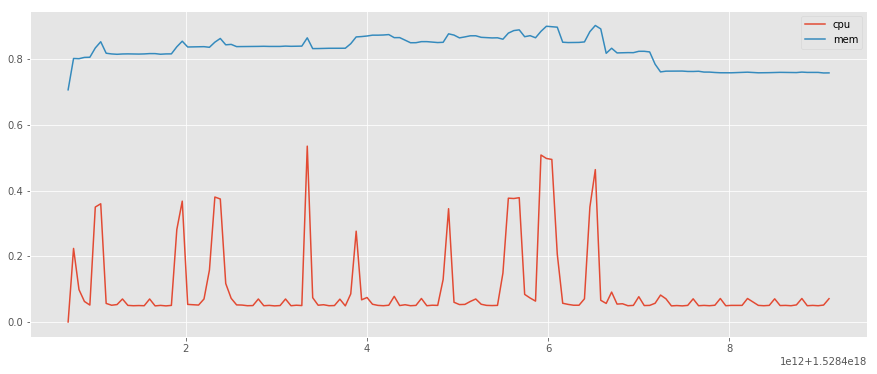

In [213]:
plt.figure()
plt.plot(dataset_node['cpu'], label='cpu')
plt.plot(dataset_node['mem'], label='mem')
plt.legend()
plt.show()

In [156]:
Result_hello_world_CPU = client.query("SELECT value from \"cpu/usage_rate\" where namespace_name = 'default' AND type = 'pod_container' AND container_name = 'hello-world-service' ")
Result_hello_world_MEM = client.query("SELECT value from \"memory/usage\" where namespace_name = 'default' AND type = 'pod_container' AND container_name = 'hello-world-service' ")
cpu_points = pd.DataFrame(Result_hello_world_CPU.get_points())
cpu_points['time'] = pd.to_datetime(cpu_points['time'])
cpu_points = cpu_points.set_index('time')
cpu_points.columns = ['cpu']
mem_points = pd.DataFrame(Result_hello_world_MEM.get_points())
mem_points['time'] = pd.to_datetime(mem_points['time'])
mem_points = mem_points.set_index('time')
mem_points.columns = ['mem']
df_pod_hello_world =pd.concat([cpu_points, mem_points], axis=1)

df_pod_hello_world['cpu'] = df_pod_hello_world['cpu']/1000
df_pod_hello_world['mem'] = df_pod_hello_world['mem']/1000000
df_pod_hello_world.to_csv('dataset_pod_hello_world.csv')

In [157]:
Result_CPU = client.query("SELECT value from \"cpu/usage_rate\" where namespace_name = 'default' AND type = 'pod_container' AND container_name = 'product-descp-service' ")
Result_MEM = client.query("SELECT value from \"memory/usage\" where namespace_name = 'default' AND type = 'pod_container' AND container_name = 'product-descp-service' ")
cpu_points = pd.DataFrame(Result_CPU.get_points())
cpu_points['time'] = pd.to_datetime(cpu_points['time'])
cpu_points = cpu_points.set_index('time')
cpu_points.columns = ['cpu']
mem_points = pd.DataFrame(Result_MEM.get_points())
mem_points['time'] = pd.to_datetime(mem_points['time'])
mem_points = mem_points.set_index('time')
mem_points.columns = ['mem']
df_pod =pd.concat([cpu_points, mem_points], axis=1)
df_pod['cpu'] = df_pod['cpu']/1000
df_pod['mem'] = df_pod['mem']/1000000
df_pod.to_csv('dataset_pod_pdescp.csv')

In [158]:
Result_CPU = client.query("SELECT value from \"cpu/usage_rate\" where namespace_name = 'default' AND type = 'pod_container' AND container_name = 'server' ")
Result_MEM = client.query("SELECT value from \"memory/usage\" where namespace_name = 'default' AND type = 'pod_container' AND container_name = 'server' ")
cpu_points = pd.DataFrame(Result_CPU.get_points())
cpu_points['time'] = pd.to_datetime(cpu_points['time'])
cpu_points = cpu_points.set_index('time')
cpu_points.columns = ['cpu']
mem_points = pd.DataFrame(Result_MEM.get_points())
mem_points['time'] = pd.to_datetime(mem_points['time'])
mem_points = mem_points.set_index('time')
mem_points.columns = ['mem']
df_pod =pd.concat([cpu_points, mem_points], axis=1)
df_pod['cpu'] = df_pod['cpu']/1000
df_pod['mem'] = df_pod['mem']/1000000
df_pod.to_csv('dataset_pod_server.csv')

In [159]:
# load dataset
dataset_pod_hello_world = read_csv('dataset_pod_hello_world.csv',index_col=0)
dataset_pod_pdescp = read_csv('dataset_pod_pdescp.csv',index_col=0)
dataset_pod_server = read_csv('dataset_pod_server.csv',index_col=0)
dataset_node = read_csv('node_util.csv',index_col=0)

# Pods Prdoduct descp vs Server Utilization (memory)


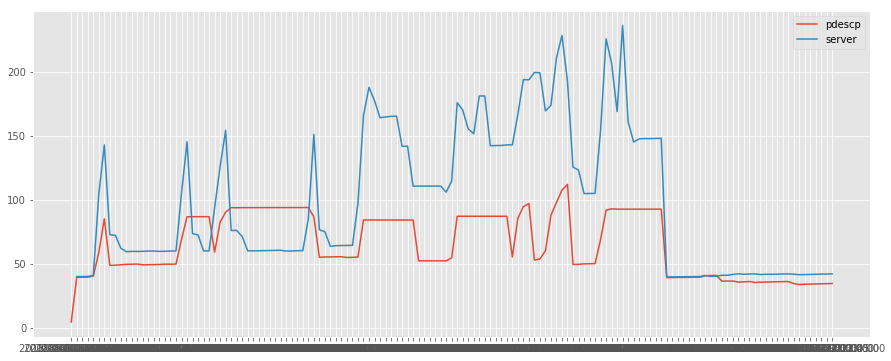

In [160]:
plt.figure()
plt.plot(dataset_pod_pdescp['mem'], label="pdescp")
plt.plot(dataset_pod_server['mem'], label="server")
plt.legend()
plt.show()

# Pods Hello-world vs Server Utilization (memory)

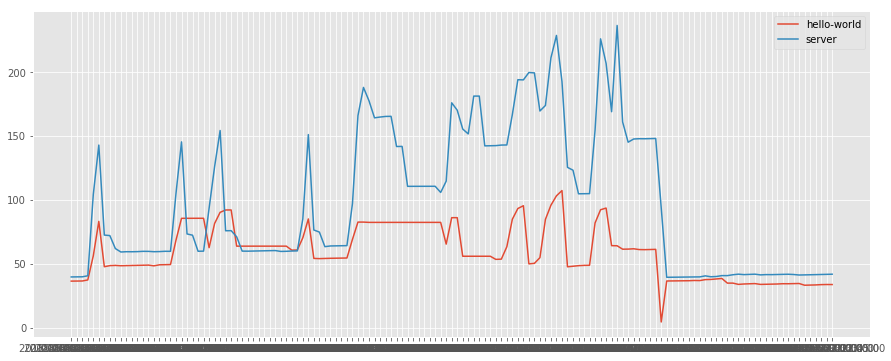

In [161]:
plt.figure()
plt.plot(dataset_pod_hello_world['mem'], label="hello-world")
plt.plot(dataset_pod_server['mem'], label="server")
plt.legend()
plt.show()

# All Pods Utilization (CPU)

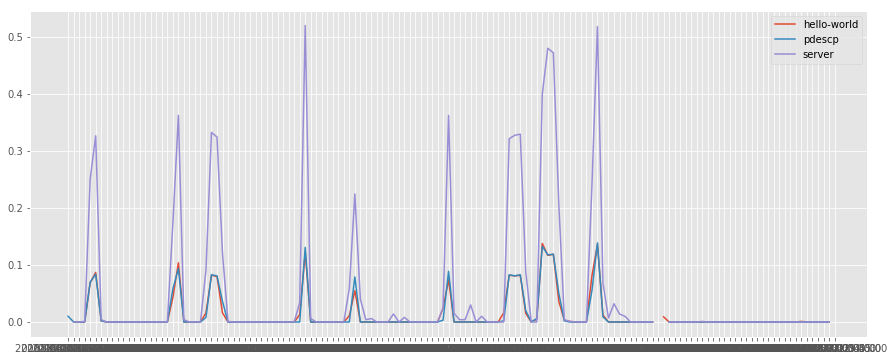

In [162]:
plt.figure()
plt.plot(dataset_pod_hello_world['cpu'], label="hello-world")
plt.plot(dataset_pod_pdescp['cpu'], label="pdescp")
plt.plot(dataset_pod_server['cpu'], label="server")
plt.legend()
plt.show()

In [163]:
from pymongo import MongoClient

import pandas as pd
from pandas.io.json import json_normalize

In [164]:
client = MongoClient('localhost', 27017)
db = client['data']

In [165]:
datapoints = list(db.loadtestmodels100_10000.find({}))
datapoints2 = list(db.loadtestmodels100_15000.find({}))
datapoints3 = list(db.loadtestmodels100_20000.find({}))
datapoints4 = list(db.loadtestmodels150_10000.find({}))
datapoints5 = list(db.loadtestmodels150_30000.find({}))
datapoints6 = list(db.loadtestmodels200_10000.find({}))
datapoints7 = list(db.loadtestmodels250_15000.find({}))

In [166]:
def GetShortenSet(datapoints):
    df2 = json_normalize(datapoints)
    if(len(df2.requestElapsedS.value_counts()) > 0):
        df2['requestElapsedS'] = pd.to_numeric(df2['requestElapsedS'], downcast='float')
    if(len(df2.requestIndexS.value_counts()) > 0):
        df2['requestIndexS'] = pd.to_numeric(df2['requestIndexS'], downcast='float')
    if(len(df2.instanceIndexS.value_counts()) > 0):
        df2['instanceIndexS'] = pd.to_numeric(df2['instanceIndexS'], downcast='float')
    df2 = df2.drop(['__v', '_id', 'resultS.body', 'resultS.headers.connection', 'resultS.headers.content-length', 
          'resultS.headers.content-type', 'resultS.headers.date', 'resultS.headers.etag', 'resultS.headers.x-powered-by', 'resultS.host',
         'resultS.method', 'resultS.path', 'resultS.instanceIndex', 'resultS.requestElapsed', 'resultS.requestIndex', 
         'resultS.statusCode', 'latencyS.maxLatencyMs','latencyS.minLatencyMs','latencyS.percentiles.50','latencyS.percentiles.90', 
             'latencyS.percentiles.95','latencyS.percentiles.99','latencyS.totalErrors',     ], axis=1)
    df2['time'] = pd.to_datetime(df2['time'],unit='ms')
    return df2

In [167]:
df_models_1 = GetShortenSet(datapoints)
df_models_2 = GetShortenSet(datapoints2)
df_models_3 = GetShortenSet(datapoints3)
df_models_4 = GetShortenSet(datapoints4)
df_models_5 = GetShortenSet(datapoints5)
df_models_6 = GetShortenSet(datapoints6)
df_models_7 = GetShortenSet(datapoints7)

In [168]:
df_models_2

,errorS,instanceIndexS,latencyS.meanLatencyMs,latencyS.rps,latencyS.totalRequests,latencyS.totalTimeSeconds,requestElapsedS,requestIndexS,time
0,None,2.0,19.1,33,1,0.030550,19.148676,0.0,2018-06-07 20:10:41.100
1,None,2.0,66.4,15,2,0.130284,113.625923,1.0,2018-06-07 20:10:41.199
2,None,2.0,80.0,23,3,0.132369,107.261467,2.0,2018-06-07 20:10:41.201
3,None,2.0,83.2,30,4,0.133660,92.843987,3.0,2018-06-07 20:10:41.202
4,None,2.0,82.9,37,5,0.134838,81.861053,4.0,2018-06-07 20:10:41.204
5,None,2.0,82.2,44,6,0.136421,78.467865,5.0,2018-06-07 20:10:41.205
6,None,2.0,81.9,50,7,0.139323,80.439789,6.0,2018-06-07 20:10:41.208
7,None,2.0,81.5,57,8,0.140510,78.683197,7.0,2018-06-07 20:10:41.209
8,None,2.0,80.9,64,9,0.141666,75.966843,8.0,2018-06-07 20:10:41.210
9,None,2.0,79.7,70,10,0.142847,68.234360,9.0,2018-06-07 20:10:41.212


In [169]:
merged =df_models_1.append([df_models_2, df_models_3, df_models_4, df_models_5, df_models_6, df_models_7])
merged = merged.set_index('time')
merged.sort_index(inplace=True)
merged.to_csv('request_data.csv')

In [170]:
#merged = read_csv('request_data.csv',index_col=0, low_memory=False)
merged

,errorS,instanceIndexS,latencyS.errorCodes.-1,latencyS.meanLatencyMs,latencyS.rps,latencyS.totalRequests,latencyS.totalTimeSeconds,requestElapsedS,requestIndexS
time,,,,,,,,,
2018-06-07 19:49:12.508,None,0.0,NaN,99.5,9,1,0.108292,99.452316,0.0
2018-06-07 19:49:12.531,None,0.0,NaN,108.6,15,2,0.131139,117.814590,1.0
2018-06-07 19:49:12.535,None,0.0,NaN,110.6,22,3,0.135752,114.454086,2.0
2018-06-07 19:49:12.537,None,0.0,NaN,109.5,29,4,0.137824,106.254051,3.0
2018-06-07 19:49:12.538,None,0.0,NaN,102.2,36,5,0.138909,73.110306,4.0
2018-06-07 19:49:12.540,None,0.0,NaN,97.1,43,6,0.140600,71.786263,5.0
2018-06-07 19:49:12.543,None,0.0,NaN,93.8,49,7,0.143253,74.037277,6.0
2018-06-07 19:49:12.547,None,0.0,NaN,91.9,54,8,0.148055,78.244682,8.0
2018-06-07 19:49:12.549,None,0.0,NaN,90.0,60,9,0.149143,74.469521,9.0


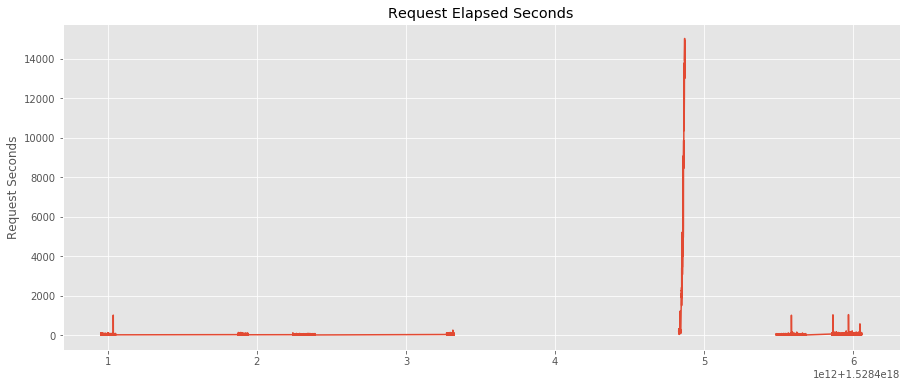

In [171]:
plt.plot(merged['requestElapsedS'])
plt.title("Request Elapsed Seconds")
plt.ylabel("Request Seconds")
plt.grid(True)
plt.show()

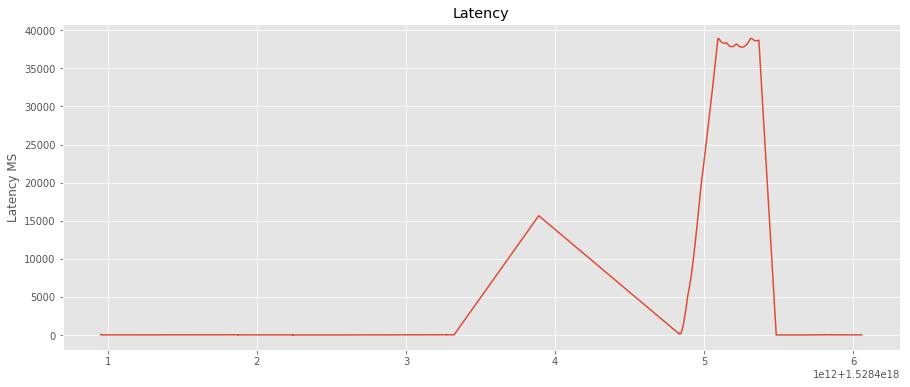

In [172]:
plt.plot(merged['latencyS.meanLatencyMs'])
plt.title("Latency")
plt.ylabel("Latency MS")
plt.grid(True)
plt.show()

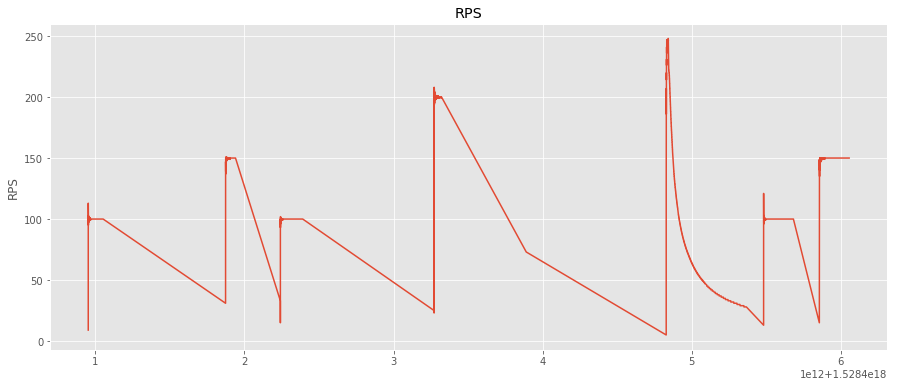

In [173]:
plt.plot(merged['latencyS.rps'])
plt.title("RPS")
plt.ylabel("RPS")
plt.grid(True)
plt.show()

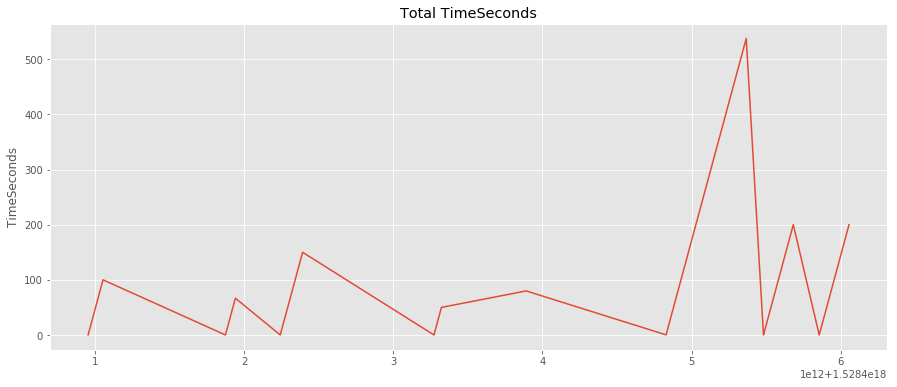

In [174]:
plt.plot(merged['latencyS.totalTimeSeconds'])
plt.title("Total TimeSeconds")
plt.ylabel("TimeSeconds")
plt.grid(True)
plt.show()

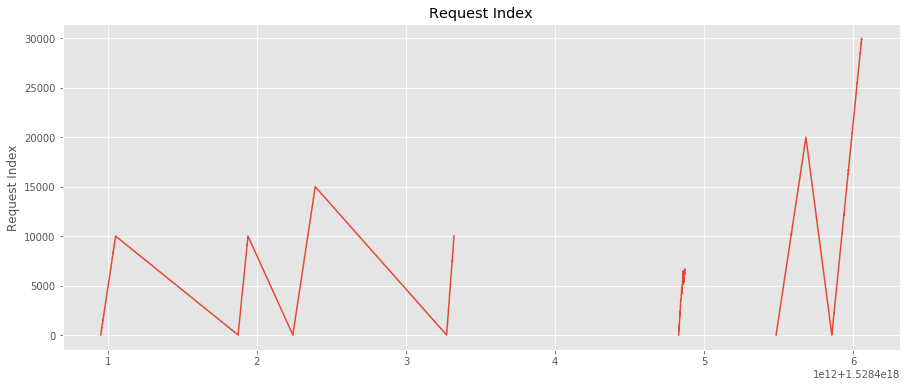

In [175]:
plt.plot(merged['requestIndexS'])
plt.title("Request Index")
plt.ylabel("Request Index")
plt.grid(True)
plt.show()

In [177]:
dataset_node.index = pd.to_datetime(dataset_node.index)

# Merging Request data with Node resource utilization

In [192]:
########### to be checked two merge possible here 
#newmerged = merged.reindex(dataset_node.index, method='nearest')
newmerged = dataset_node.reindex(merged.index, method='nearest')
newmerged.head()

,cpu,mem
time,,
2018-06-07 19:49:12.508,0.0515,0.806219
2018-06-07 19:49:12.531,0.0515,0.806219
2018-06-07 19:49:12.535,0.0515,0.806219
2018-06-07 19:49:12.537,0.0515,0.806219
2018-06-07 19:49:12.538,0.0515,0.806219


In [180]:
finalDF = pd.merge(newmerged, merged, left_index=True, right_index=True)

finalDF.to_csv('final.csv')

In [193]:
finalDF.head()

,cpu,mem,errorS,instanceIndexS,latencyS.errorCodes.-1,latencyS.meanLatencyMs,latencyS.rps,latencyS.totalRequests,latencyS.totalTimeSeconds,requestElapsedS,requestIndexS
time,,,,,,,,,,,
2018-06-07 19:49:12.508,0.0515,0.806219,None,0.0,NaN,99.5,9,1,0.108292,99.452316,0.0
2018-06-07 19:49:12.531,0.0515,0.806219,None,0.0,NaN,108.6,15,2,0.131139,117.814590,1.0
2018-06-07 19:49:12.535,0.0515,0.806219,None,0.0,NaN,110.6,22,3,0.135752,114.454086,2.0
2018-06-07 19:49:12.537,0.0515,0.806219,None,0.0,NaN,109.5,29,4,0.137824,106.254051,3.0
2018-06-07 19:49:12.538,0.0515,0.806219,None,0.0,NaN,102.2,36,5,0.138909,73.110306,4.0


In [197]:
df = read_csv('final.csv',index_col=0)
df = df.drop(['errorS', 'latencyS.errorCodes.-1', 'instanceIndexS', 'latencyS.meanLatencyMs', 'requestElapsedS'  ], axis=1)

df.head()

C:\Users\ansjin\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cpu,mem,latencyS.rps,latencyS.totalRequests,latencyS.totalTimeSeconds,requestIndexS
time,,,,,,
2018-06-07 19:49:12.508,0.0515,0.806219,9,1,0.108292,0.0
2018-06-07 19:49:12.531,0.0515,0.806219,15,2,0.131139,1.0
2018-06-07 19:49:12.535,0.0515,0.806219,22,3,0.135752,2.0
2018-06-07 19:49:12.537,0.0515,0.806219,29,4,0.137824,3.0
2018-06-07 19:49:12.538,0.0515,0.806219,36,5,0.138909,4.0


In [205]:
df = df.fillna(0)
dft = df
dft = dft.sort_values(by=['latencyS.rps'])

# Request Per second vs VM Utilization (CPU)

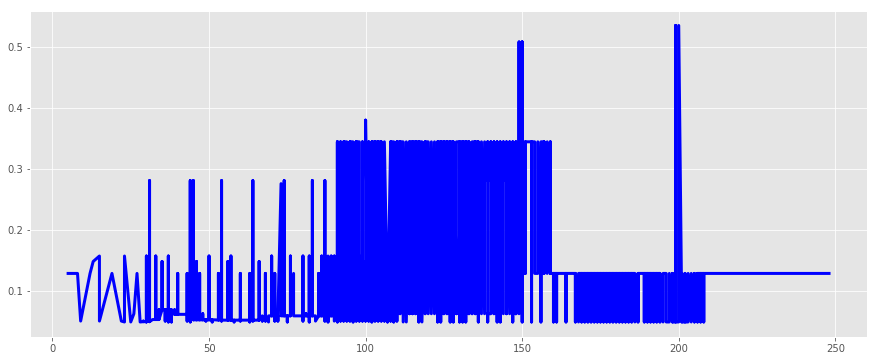

In [206]:
dft = dft[['latencyS.rps', 'cpu']]
plt.plot(dft['latencyS.rps'], dft['cpu'], color='blue', linewidth=3)

# Linear Regression

In [207]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [208]:
# Use only one feature
df_X = dft[['latencyS.rps']]
df_Y = dft[['cpu']]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)


In [210]:
y_test.shape

(36301, 1)

Mean squared error: 0.03
Variance score: 0.00


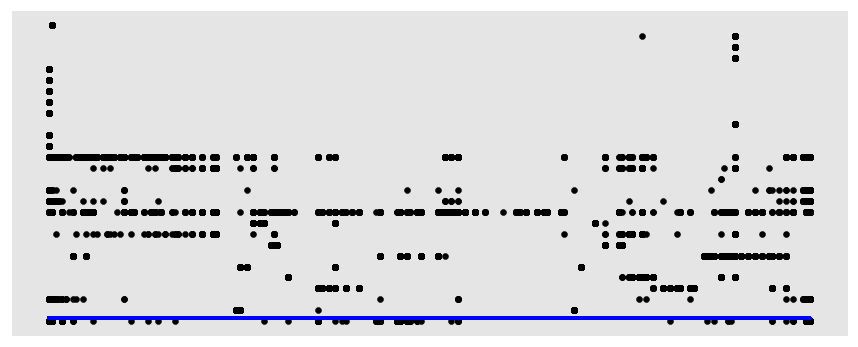

In [211]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Create linear regression object
regr = linear_model.LinearRegression()
#regr = linear_model.Ridge (alpha = .5)
#regr = linear_model.Lasso(alpha = 0.1)
#regr = linear_model.LassoLars(alpha=.1)
#regr = make_pipeline(PolynomialFeatures(3), Ridge())

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()